Matplotlib created a temporary cache directory at /tmp/matplotlib-6zredqyv because the default path (/home/justin/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


      Character Error Rate (%)      Participant  Word Error Rate (%)
0                            5   T5 Handwriting                    9
1                            5   T5 Handwriting                   12
2                            5   T5 Handwriting                    0
3                            5   T5 Handwriting                   10
4                            5   T5 Handwriting                    0
...                        ...              ...                  ...
1555                        65  T18 Handwriting                   90
1556                        65  T18 Handwriting                  100
1557                        65  T18 Handwriting                  100
1558                        65  T18 Handwriting                   85
1559                        65  T18 Handwriting                   80

[1560 rows x 3 columns]


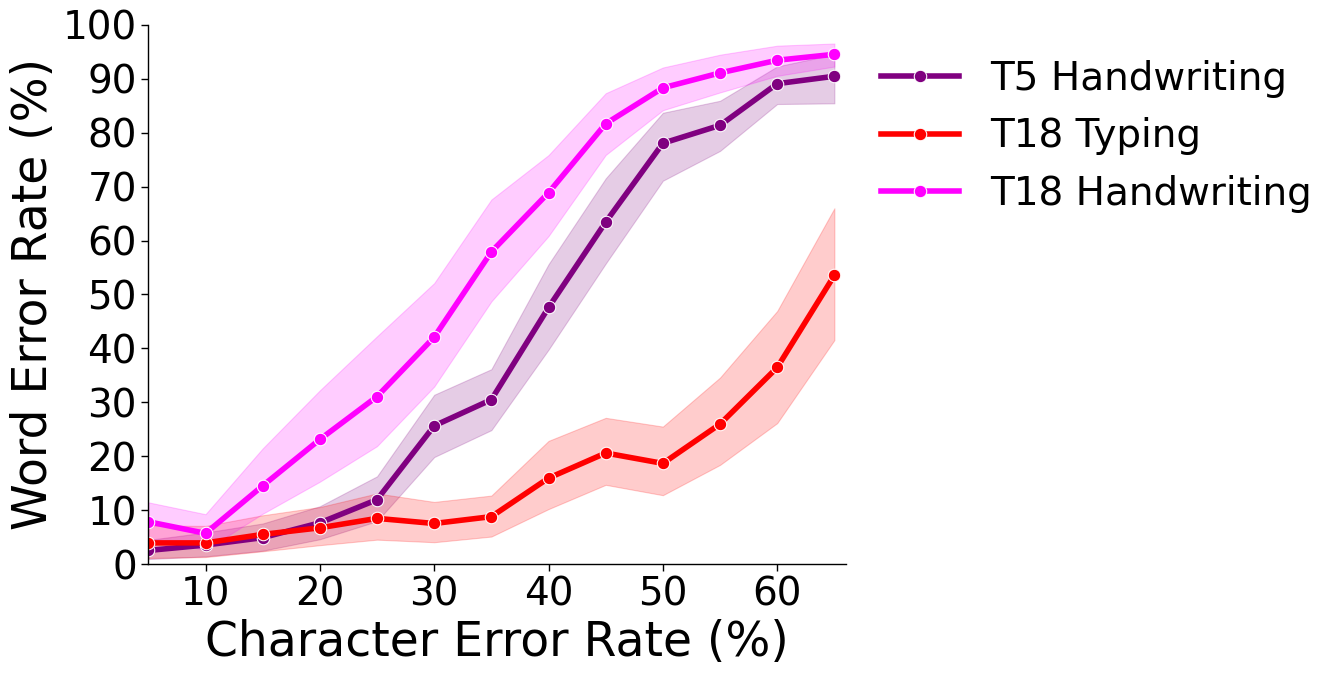

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
all_CERs = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65]
all_raw_cers = []
all_postLM_cers = []
all_postLM_wers = []
data_frame = []
plt.rcParams["figure.figsize"] = (9 ,7)
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":34, 'legend.fontsize': 28, 'lines.markersize':9})   
for current_cer in all_CERs:
    postLM_wers = np.load('T5HandwritingLMComparison/T5Train-' + str(current_cer) + '-WERPostLM-Acoustic1.0.npy')
    for trial in range(postLM_wers.shape[0]):
        data_frame.append([int(current_cer*100), 'T5 Handwriting', int(postLM_wers[trial]*100)])

for current_cer in all_CERs:
    postLM_wers = np.load('T18TypingLMComparison/T18Train-' + str(current_cer) + '-WERPostLM-open-bp4.npy')
    for trial in range(postLM_wers.shape[0]):
        data_frame.append([int(current_cer*100), 'T18 Typing', int(postLM_wers[trial]*100)])

for current_cer in all_CERs:
    postLM_wers = np.load('T18HandwritingLMComparison/T18HWTrain-' + str(current_cer) + '-WERPostLM-60Train-Acoustic04.npy')
    for trial in range(postLM_wers.shape[0]):
        data_frame.append([int(current_cer*100), 'T18 Handwriting', int(postLM_wers[trial]*100)])
        
df = pd.DataFrame(data_frame, columns=['Character Error Rate (%)', 'Participant', 'Word Error Rate (%)'])
print(df)
flatui = ['#a6cee3','#1f78b4','#33a02c','#fb9a99','#e31a1c','#ff7f00','#cab2d6','#6a3d9a']
flatui = ['purple', 'red', 'magenta']
sns.set_palette(flatui)
g = sns.lineplot(x='Character Error Rate (%)', y='Word Error Rate (%)', hue='Participant', marker='o', data=df, linewidth=4)
sns.despine()
plt.gca().legend().set_title('')

plt.xlim([5, 66])
plt.ylim([0, 100])
plt.legend(frameon=False)
g.xaxis.set_major_locator(ticker.MultipleLocator(10))
g.yaxis.set_major_locator(ticker.MultipleLocator(10))
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.savefig('T5T18LMComparison.pdf', bbox_inches='tight')
plt.show()